In [18]:
# import libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra 
import sklearn # machine learning library
from sklearn.linear_model import LinearRegression # linear regression model 
from sklearn.metrics import mean_squared_error # mean squared error
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # one hot encoder, min max scaler
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import warnings
warnings.filterwarnings('ignore') # ignore warnings
import joblib # save and load models


In [19]:

# Read the data from the CSV file and store it in a dataframe
df = pd.read_csv('C:\myprojects\civil\data_concrete_pulse_vel.csv')

# Remove any rows with missing values
df= df.dropna()

# Replace the string values in the 'time' column with their corresponding numerical values
df["time"] = df["time"].replace({'0h': 0, '4h': 4, '8h': 8, '12h': 12})

# Display the information of the dataframe such as the number of entries, columns, data types of each column, etc.
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 127
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   grade      80 non-null     object 
 1   temp       80 non-null     object 
 2   time       80 non-null     int64  
 3   Pulse_vel  80 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ KB


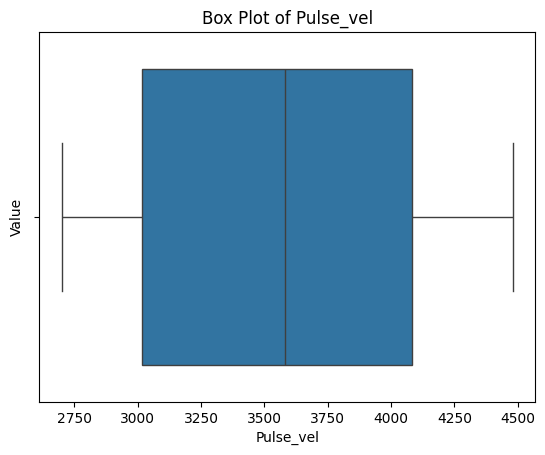

In [20]:
# Use seaborn to create a boxplot of the 'Pulse_vel' column in the dataframe
sns.boxplot(data=df, x='Pulse_vel')

# Set the x-axis label to 'Pulse_vel'
plt.xlabel('Pulse_vel')

# Set the y-axis label to 'Value'
plt.ylabel('Value')

# Set the title of the plot to 'Box Plot of Pulse_vel'
plt.title('Box Plot of Pulse_vel')

# Display the plot
plt.show()


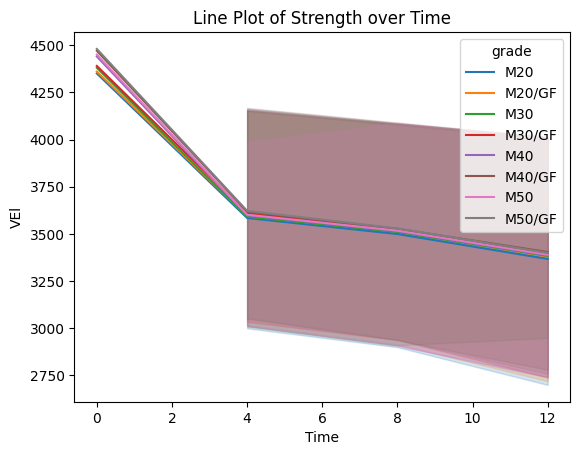

In [21]:
# Create a line plot with 'time' on the x-axis and 'Pulse_vel' on the y-axis
# Different 'grade' values are represented with different colors (hue)
sns.lineplot(data=df, x='time', y='Pulse_vel', hue='grade')

# Set the x-axis label to 'Time'
plt.xlabel('Time')

# Set the y-axis label to 'VEl'
plt.ylabel('VEl')

# Set the title of the plot to 'Line Plot of Strength over Time'
plt.title('Line Plot of Strength over Time')

# Display the plot
plt.show()


In [22]:
# Create a deep copy of the original dataframe to avoid modifying it
df_model = df.copy(deep=True)

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder to the 'grade' and 'temp' columns of the dataframe
encode = encoder.fit(df_model[['grade', 'temp']])

# Transform the 'grade' and 'temp' columns into one-hot encoded arrays
encoded_features = encode.transform(df_model[['grade', 'temp']]).toarray()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the 'time' column and transform it
gf_scaled = scaler.fit_transform(df_model[['time']])

# Concatenate the one-hot encoded features and the scaled 'time' column to form the feature matrix X
X = np.concatenate([encoded_features, gf_scaled], axis=1)

# Use the 'Pulse_vel' column as the target variable y
y_true = df_model['Pulse_vel'].values


In [23]:
# Instantiate the Linear Regression model
model_vel = LinearRegression()

# Fit the model with the feature matrix X and the target variable y_true
model_vel.fit(X, y_true)


LinearRegression()

In [24]:
# Use the trained model to predict the target variable 'Pulse_vel' for the feature matrix X
y_pred_comp =  model_vel.predict(X)

# Calculate the mean squared error between the predicted and actual values of 'Pulse_vel'
mse_vel = mean_squared_error(y_pred_comp, y_true)

# Print the calculated mean squared error
print(f'Mean Squared Error (VEL): {mse_vel:.2f}')


Mean Squared Error (VEL): 888.58


In [25]:
def predict_velocity(grade, temp, time):
    """
    Predicts the strengths based on the given input parameters.

    Parameters:
    grade (str): The grade of the material.
    temp (str): The temperature in degrees Celsius.
    time (int): The time in hours.

    Returns:
    None
    """
    # Encode the grade and time using the previously defined encoder
    encoded_grade_temp = encode.transform([[grade, temp]]).toarray()

    # Normalize the percentage mix
    normalized_time = scaler.transform([[time]])

    # Prepare the input features
    input_features = np.concatenate([encoded_grade_temp, normalized_time], axis=1)

    # Predict the strengths using the trained models
    predicted_velocitys = (model_vel.predict(input_features))

    # Return the predicted strengths
    return print(f'Predicted vel: {predicted_velocitys[0]:.2f} m/s')


In [26]:
# Predict the strengths for the given input parameters
predict_velocity('M40/GF', "200C", 36)

Predicted vel: 3351.00 m/s


In [ ]:
# Save the trained model to a file
joblib.dump(model_vel, 'model_vel.pkl')